In [2]:
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


---

In [3]:
# McCormick function
def f(x, y):
    return np.sin(x + y) + (x - y)**2 - 1.5*x + 2.5*y + 1

# Partial derivative with respect to x
def dx_dz(x, y):
    return np.cos(x + y) + 2*(x - y) - 1.5

# Partial derivative with respect to y
def dy_dz(y, x):
    return np.cos(x + y) - 2*(x - y) + 2.5

In [4]:
def gradient_descent(x, y, learning_rate, max_iter):
    """
    Performs gradient descent optimization to find the minimum of a function.

    Args:
        x (float): The initial x-coordinate.
        y (float): The initial y-coordinate.
        learning_rate (float): The learning rate for the optimization.
        max_iter (int): The max number of iterations to perform.

    Returns:
        tuple: A tuple containing the x-coordinates, y-coordinates, function values, and the number of iterations taken.

    """
    z = f(x, y)

    x_journey = [x]
    y_journey = [y]
    z_journey = [z]

    iter_step = 0

    for _ in range(max_iter):
        xo, yo = x, y
        x -= learning_rate * dx_dz(xo, yo)
        y -= learning_rate * dy_dz(yo, xo)

        x_journey.append(x)
        y_journey.append(y)
        z_journey.append(f(x, y))

        iter_step += 1

        # convergence criterion
        if abs(x + 0.547) < 1e-4:
            break

    return x_journey, y_journey, z_journey, iter_step

In [5]:
beta2 = 0.99  # dont change
beta1 = 0.9  # dont change

In [6]:
# ADAM
def biased_adam(x, y, learning_rate, max_iter):
    z = f(x, y)

    # intialize momentum vector
    v_x = 0
    v_y = 0

    m_x = 0
    m_y = 0

    x_journey = [x]
    y_journey = [y]
    z_journey = [z]

    iter_step = 0
    for i in range(max_iter):
        xo, yo = x, y

        # gradient
        dx = dx_dz(xo, yo)
        dy = dy_dz(yo, xo)

        # caculate momentum vector m
        m_x = beta1 * m_x + (1 - beta1) * dx
        m_y = beta1 * m_y + (1 - beta1) * dy

        # remove biasm
        #mt_x = m_x / (1 - beta1**(i+1))
        #mt_y = m_y / (1 - beta1**(i+1))

        # caculate momentum vector v
        v_x = beta2 * v_x + (1 - beta2) * dx**2
        v_y = beta2 * v_y + (1 - beta2) * dy**2

        #remove bias
        #vt_x = v_x / (1 - beta2**(i+1))
        #vt_y = v_y / (1 - beta2**(i+1))

        # update values
        x -= learning_rate * m_x / (np.sqrt(v_x) + 1e-5)
        y -= learning_rate * m_y / (np.sqrt(v_y) + 1e-5)

        # add values
        x_journey.append(x)
        y_journey.append(y)
        z_journey.append(f(x, y))

        iter_step += 1

        # conergence criterium
        if abs(x+0.547)<1e-4:
            break
    return x_journey, y_journey, z_journey, iter_step

In [7]:
# ADAM
def adam(x, y, learning_rate, max_iter):
    """
    Performs the ADAM optimization algorithm to minimize the function f(x, y).

    Parameters:
    - x (float): The initial x-coordinate.
    - y (float): The initial y-coordinate.
    - learning_rate (float): The learning rate for the optimization.
    - max_iter (int): The max number of iterations to perform.

    Returns:
    - x_journey (list): The list of x-coordinates at each iteration.
    - y_journey (list): The list of y-coordinates at each iteration.
    - z_journey (list): The list of function values at each iteration.
    - iter_step (int): The number of iterations performed until convergence.

    """
    z = f(x, y)

    # intialize momentum vector
    v_x = 0
    v_y = 0

    m_x = 0
    m_y = 0

    x_journey = [x]
    y_journey = [y]
    z_journey = [z]

    iter_step = 0
    for i in range(max_iter):
        xo, yo = x, y

        # gradient
        dx = dx_dz(xo, yo)
        dy = dy_dz(yo, xo)

        # caculate momentum vector m
        m_x = beta1 * m_x + (1 - beta1) * dx
        m_y = beta1 * m_y + (1 - beta1) * dy

        # remove biasm
        mt_x = m_x / (1 - beta1**(i+1))
        mt_y = m_y / (1 - beta1**(i+1))

        # caculate momentum vector v
        v_x = beta2 * v_x + (1 - beta2) * dx**2
        v_y = beta2 * v_y + (1 - beta2) * dy**2

        #remove bias
        vt_x = v_x / (1 - beta2**(i+1))
        vt_y = v_y / (1 - beta2**(i+1))

        # update values
        x -= learning_rate * mt_x / (np.sqrt(vt_x) + 1e-5)
        y -= learning_rate * mt_y / (np.sqrt(vt_y) + 1e-5)

        # add values
        x_journey.append(x)
        y_journey.append(y)
        z_journey.append(f(x, y))

        iter_step += 1

        # conergence criterium
        if abs(x+0.547)<1e-4:
            break
    return x_journey, y_journey, z_journey, iter_step

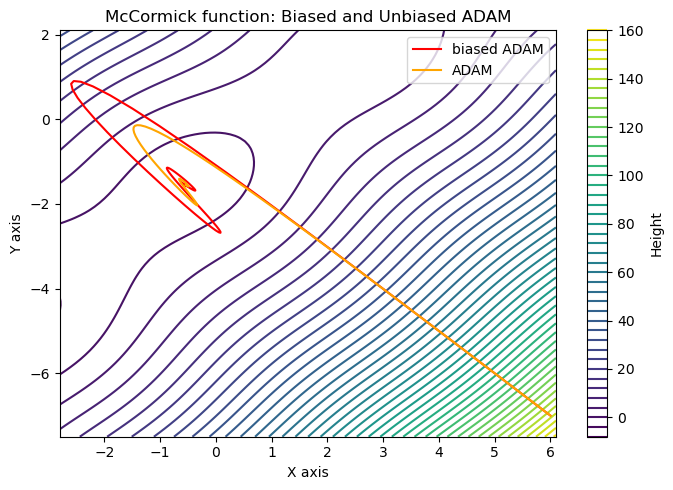

In [9]:
# Countourplot
fig, ax = plt.subplots(figsize=(7, 5))

# intialize x,y,z
x = np.linspace(-2.8, 6.1, 100)
y = np.linspace(-7.5, 2.1, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Second subplot for 2D contour plot
contour = ax.contour(x, y, z, levels=40, cmap='viridis')
ax.set_title('McCormick function: Biased and Unbiased ADAM')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.colorbar(contour, ax=ax, orientation='vertical', label='Height')

# starting point
xs = 6
ys = -7

# parameters
max_iter = 100
lr = 0.4 # learning rate

# ADAM biased
x_adam, y_adam, z_adam,iter_adam = biased_adam(xs, ys, lr, max_iter)
ax.plot(x_adam, y_adam, color='red', label='biased ADAM')

# ADAM
x_adam, y_adam, z_adam,iter_adam = adam(xs, ys, lr, max_iter)
ax.plot(x_adam, y_adam, color='orange', label='ADAM')

plt.legend()
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('/Users/ollerehnfeldt/Desktop/ADAM-Optimizer/report/figures/ADAM_biascorrection.pdf')


In [10]:
# Himmelblau's function
def f(x, y):
    """
    Himmelblau's function.

    Args:
        x (float): The x-coordinate.
        y (float): The y-coordinate.

    Returns:
        float: The value of the Himmelblau's function at (x, y).

    """
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def dx_dz(x, y):
    """
    Partial derivative of Himmelblau's function with respect to x.

    Args:
        x (float): The x-coordinate.
        y (float): The y-coordinate.

    Returns:
        float: The partial derivative of Himmelblau's function with respect to x at (x, y).

    """
    return 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)

def dy_dz(y, x):
    """
    Partial derivative of Himmelblau's function with respect to y.

    Args:
        x (float): The x-coordinate.
        y (float): The y-coordinate.

    Returns:
        float: The partial derivative of Himmelblau's function with respect to y at (x, y).

    """
    return 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)


In [11]:
# Baels function
def f(x, y):
    """
    Beale's function.

    Args:
        x (float): The x-coordinate.
        y (float): The y-coordinate.

    Returns:
        float: The value of Beale's function at (x, y).

    """
    term1 = (1.5 - x + x * y) ** 2
    term2 = (2.25 - x + x * y ** 2) ** 2
    term3 = (2.625 - x + x * y ** 3) ** 2
    return term1 + term2 + term3

def dx_dz(x, y):
    """
    Gradient of Beale's function.

    Args:
        x (float): The x-coordinate.
        y (float): The y-coordinate.

    Returns:
        tuple: A tuple containing the partial derivatives of Beale's function with respect to x and y at (x, y).

    """
    dx = 2 * (1.5 - x + x * y) * (y - 1) + 2 * (2.25 - x + x * y ** 2) * (y ** 2 - 1) + 2 * (2.625 - x + x * y ** 3) * (y ** 3 - 1)
    return dx
def dy_dx(y,x):
    dy = 2 * (1.5 - x + x * y) * x + 4 * (2.25 - x + x * y ** 2) * x * y + 6 * (2.625 - x + x * y ** 3) * x * y ** 2
    return dy


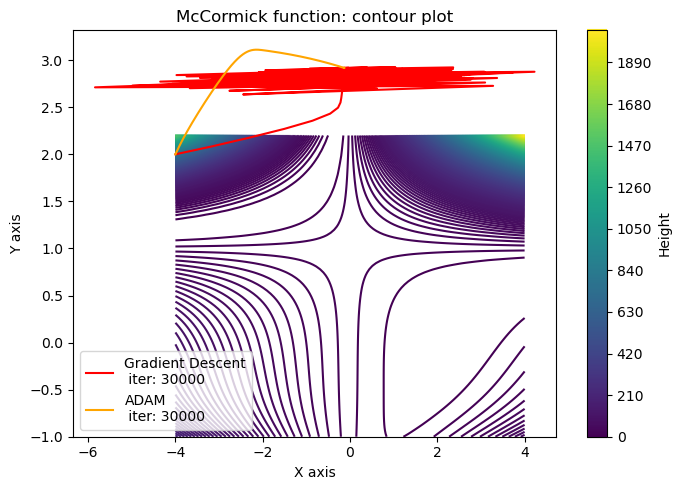

In [12]:
# Countourplot
fig, ax = plt.subplots(figsize=(7, 5))

# intialize x,y,z
x = np.linspace(-4, 4, 100)
y = np.linspace(-1, 2.2, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Second subplot for 2D contour plot
contour = ax.contour(x, y, z, levels=400, cmap='viridis')
ax.set_title('McCormick function: contour plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.colorbar(contour, ax=ax, orientation='vertical', label='Height')

# starting point
xs = -4
ys = 2

# parameters
max_iter = 30000
lr = 0.002 # learning rate

# Gradient Descent
x_gd, y_gd, z_gd, iter_steps_gd = gradient_descent(xs, ys, lr, max_iter)
ax.plot(x_gd, y_gd, color='r', label='Gradient Descent\n iter: {}'.format(iter_steps_gd))

# ADAM
x_adam, y_adam, z_adam,iter_adam = adam(xs, ys, lr, max_iter)
ax.plot(x_adam, y_adam, color='orange', label='ADAM\n iter: {}'.format(iter_adam))

plt.legend()
plt.tight_layout()
plt.show()